# Using Machine Learning Algorithms - Logistic Regression for Image Classification

## What is machine learning?

Machine learning is a of computer science that evolved from the study of pattern recognition and computational learning theory in artificial intelligence. Machine learning explores the study and construction of algorithms that can learn from and make predictions on data. Such algorithms operate by building a model from an example training set of input observations in order to make data-driven predictions or decisions expressed as outputs, rather than following strictly static program instructions.

Broadly, there are 3 types of Machine Learning Algorithms:
1. <b> Supervised Learning - </b> This algorithm consist of a target / outcome variable (or dependent variable) which is to be predicted from a given set of predictors (independent variables). Using these set of variables, we generate a function that map inputs to desired outputs. The training process continues until the model achieves a desired level of accuracy on the training data.

2. <b> Unsupervised Learning - </b> In this algorithm, we do not have any target or outcome variable to predict / estimate.  It is used for clustering population in different groups, which is widely used for segmenting customers in different groups for specific intervention.

3. <b> Reinforcement Learning: </b> Using this algorithm, the machine is trained to make specific decisions. It works this way: the machine is exposed to an environment where it trains itself continually using trial and error. This machine learns from past experience and tries to capture the best possible knowledge to make accurate business decisions.

Some of the commonly used machine learning algorithms are Linear Regression, Logistic Regression, Decision Tree, SVM, Naive Bayes, kNN, K-Means, Random Forest, etc.

### Basic Requirements to run this notebook
This Python notebook shows you how to use machine learning to build a classification model that maps images of single digit numbers to their corresponding numeric representations.

This notebook is adapted from various machine learning tutorials that describes the important machine learning concepts and includes code snippets here.

## What is Logistic Regression?

# Logistic Regression

<b> Introduction to Logistic Regression </b>

The logistic regression is a predictive analysis, like all regression analyses.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.
Mathematically, logistic regression estimates a multiple linear regression function defined as:
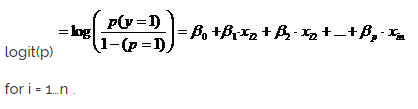
The logit transformation is referred to as the link function in logistic regression—although the dependent variable in logistic regression is Bernoulli, the logit is on an unrestricted scale.

The logit of success is then fitted to the predictors. The predicted value of the logit is converted back into predicted odds via the inverse of the natural logarithm, namely the exponential function. Thus, although the observed dependent variable in binary logistic regression is a zero-or-one variable, the logistic regression estimates the odds, as a continuous variable, that the dependent variable is a success (a case). In some applications the odds are all that is needed. In others, a specific yes-or-no prediction is needed for whether the dependent variable is or is not a case; this categorical prediction can be based on the computed odds of a success, with predicted odds above some chosen cutoff value being translated into a prediction of a success.

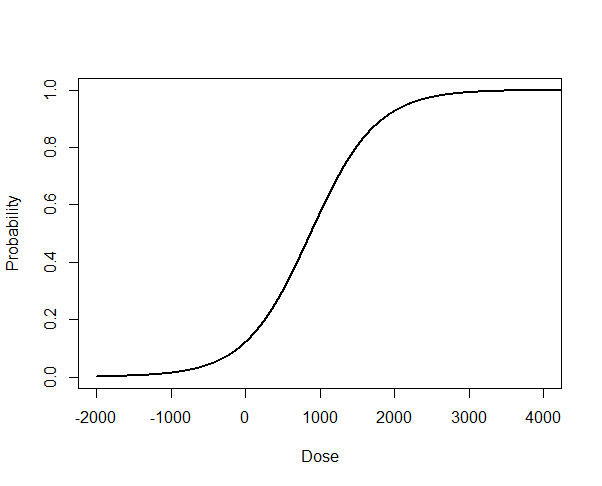

### Installing Python Libraries
Import libraries like sklearn and numpy that you will be using to run this notebook.

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

## Loading MNIST data set of handwritten digits
MNIST is a database of handwritten numbers.You can also refer to the <a href="http://yann.lecun.com/exdb/mnist/">link</a> to view and read about MNIST datatset. Since MNIST uses real-world data, it is an ideal database for training neural networks and machine learning tools that use pattern recognition.
Run the following cell to get the MNIST data set of images of handwritten numbers:

In [2]:
TestData='./mnist_png/testing'
TrainData='./mnist_png/training'
Numbers=['0','1','2','3','4','5','6','7','8','9']
Testing_Path=os.path.join(os.getcwd(),TestData)
Training_Path=os.path.join(os.getcwd(),TrainData)
Path=os.path.join(Training_Path,'2')
print(Path)
for i in os.listdir(Path):
    display(Image(filename=os.path.join(Path,i)))
    break

C:/Users/Radhika/Desktop/NEU_Sem2/Big Data/Project_big_data/mnist_png/training\2


## Pickling the data

<b> Pickling </b> is a way to convert a python object into a character stream. It “serialises” the object first before writing it to file. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.


In [3]:
PickledFiles=[]
for i in Numbers:
    PickledFiles.append(i+'.pickle')

In [4]:
img_size = 28  # Pixel width and height.
pixeldepth = 255.0  # Number of levels per pixel.
CorruptedImg=np.zeros((img_size, img_size),dtype=np.float32)
def load_letter(folder, Max_images):  
  imgfiles = os.listdir(folder)
  data = np.ndarray(shape=(Max_images, img_size, img_size),
                         dtype=np.float32)
  print(folder)
  imgNo = 0
  for img in imgfiles:
    imgfile = os.path.join(folder, img)
    try:
      imgdata = (ndimage.imread(imgfile).astype(float) - 
                    pixeldepth / 2) / pixeldepth
      if np.array_equal(imgdata,CorruptedImg):
            print('Corrupted')
            continue
      #print('All fine')      
      if imgdata.shape != (img_size, img_size):
        raise Exception('Unexpected image shape: %s' % str(imgdata.shape))
      data[imgNo, :, :] = imgdata
      imgNo = imgNo + 1
      if imgNo==Max_images:
        return data
    except IOError as e:
      print('Could not read:', imgfile, ':', e, '- it\'s ok, skipping.')

for i in os.listdir(Training_Path):
     set_filename=i+'.pickle'
     if set_filename in os.listdir(os.getcwd()):
        print(i+' is Already Pickled ')
     else:
        
         data1=loadletter(os.path.join(Training_Path,i), 5000)
         print(data1.shape)   
         #print(os.path.join(Testing_Path,i))
         data2=loadletter(os.path.join(Testing_Path,i),890)
         print(data2.shape)
         data = np.ndarray(shape=(data1.shape[0]+data2.shape[0], img_size, img_size),
                         dtype=np.float32)
         for i in range(data1.shape[0]):
                data[i,:,:]=data1[i,:,:]
         for i in range(data2.shape[0]):
                data[data1.shape[0]+i,:,:]=data1[i,:,:]
         print(data.shape)       
         try:
            with open(set_filename, 'wb') as f:
              pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
         except Exception as e:
            print('Unable to save data to', set_filename, ':', e)

0 is Already Pickled 
1 is Already Pickled 
2 is Already Pickled 
3 is Already Pickled 
4 is Already Pickled 
5 is Already Pickled 
6 is Already Pickled 
7 is Already Pickled 
8 is Already Pickled 
9 is Already Pickled 


In [5]:
sum1=0
for pickle_file in PickledFiles:
    f=open(pickle_file,'rb')
    data3=pickle.load(f)
    sum1=sum1+data3.shape[0]
    print(data3.shape)
print(sum1)    

(5890, 28, 28)
(5890, 28, 28)
(5890, 28, 28)
(5890, 28, 28)
(5890, 28, 28)
(5890, 28, 28)
(5890, 28, 28)
(5890, 28, 28)
(5890, 28, 28)
(5890, 28, 28)
58900


(5890, 28, 28)


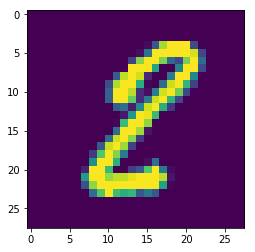

In [6]:
pickle_file = PickledFiles[2]  
with open(pickle_file, 'rb') as f:
    letterset = pickle.load(f)
    print(letterset.shape)
    sample_idx = np.random.randint(len(letterset))  
    sampleimg = letterset[sample_idx, :, :]  
    plt.figure()
    plt.imshow(sampleimg)  

In [7]:
for i in range(letterset.shape[0]):
    if np.array_equal(letterset[i,:,:],np.zeros((28,28),dtype=np.float32)):
        print(i,'True')

In [8]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    data = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray((nb_rows,), dtype=np.int32)
  else:
    data, labels = None, None
  return data, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  classesNo = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, img_size)
  trainingdataset, train_labels = make_arrays(train_size, img_size)
  vsize_per_class = valid_size // classesNo
  tsize_per_class = train_size // classesNo
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):
    print(label,":",pickle_file)    
    try:
      with open(pickle_file, 'rb') as f:
        letterset = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letterset)
        if valid_dataset is not None:
          valid_letter = letterset[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letterset[vsize_per_class:end_l, :, :]
        trainingdataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, trainingdataset, train_labels
            
            
train_size = 50000
valid_size = 8000
test_size = 900

valid_dataset, valid_labels, trainingdataset, train_labels = merge_datasets(
  PickledFiles, train_size, valid_size)
_, _, testingdataset, test_labels = merge_datasets(PickledFiles, test_size)

print('Training:', trainingdataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', testingdataset.shape, test_labels.shape)

0 : 0.pickle
1 : 1.pickle
2 : 2.pickle
3 : 3.pickle
4 : 4.pickle
5 : 5.pickle
6 : 6.pickle
7 : 7.pickle
8 : 8.pickle
9 : 9.pickle
0 : 0.pickle
1 : 1.pickle
2 : 2.pickle
3 : 3.pickle
4 : 4.pickle
5 : 5.pickle
6 : 6.pickle
7 : 7.pickle
8 : 8.pickle
9 : 9.pickle
Training: (50000, 28, 28) (50000,)
Validation: (8000, 28, 28) (8000,)
Testing: (900, 28, 28) (900,)


## Randomizing the labels

Generate a random order of elements with np.random.permutation and simply index into the arrays data and classes with those:

In [9]:
def randomize(data, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = data[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
trainingdataset, train_labels = randomize(trainingdataset, train_labels)
testingdataset, test_labels = randomize(testingdataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [10]:
pickle_file = os.path.join(os.getcwd(), 'Data.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'trainingdataset': trainingdataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'testingdataset': testingdataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [11]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 184946506


In [15]:
print(trainingdataset.shape)

(50000, 784)


## Importing the Logistic Regression classifier

In [13]:
import time as t
clf='LogisticRegressionCLassifier.pickle'
if clf in os.listdir(os.getcwd()):
    print('Classifier Already Present')
    f=open('LogisticRegressionCLassifier.pickle','rb')
    Clf=pickle.load(f)
    print(Clf)
else:    
    clf = LogisticRegressionCV()
    trainingdataset=trainingdataset.reshape((trainingdataset.shape[0],trainingdataset.shape[1]*trainingdataset.shape[2]))
    print(trainingdataset.shape)
    print(train_labels.shape)
    A=t.time()
    print('Training start time',t.time())
    clf.fit(trainingdataset,train_labels)
    print('Training End Time time',t.time())
    print('Time taken',t.time()-A,'seconds')
    A=t.time()
    print('Prediction start time',t.time())
    print('Train_Accuracy',accuracy_score(train_labels,clf.predict(trainingdataset)))
    print('Prediction time taken',t.time()-A,'seconds')
    f=open('LogisticRegressionCLassifier.pickle','wb')
    pickle.dump(clf,f,pickle.HIGHEST_PROTOCOL)
    f.close()

(50000, 784)
(50000,)
Training start time 1522283931.8172934
Training End Time time 1522285372.5232012
Time taken 1440.7229189872742 seconds
Prediction start time 1522285372.5402124
Train_Accuracy 0.92808
Prediction time taken 0.6093595027923584 seconds


## The model took less time to get trained when the data is pickled. The training accuracy achieved is 92.81%

In [14]:
import pickle
import os
from sklearn.metrics import accuracy_score
print(os.getcwd())
f=open('LogisticRegressionCLassifier.pickle','rb')
Clf=pickle.load(f)
Data=open('Data.pickle','rb')
testingdata=pickle.load(Data)['testingdataset']
Data.close()
Data=open('Data.pickle','rb')
test_labels=pickle.load(Data)['test_labels']
print(test_labels.shape)
print(testingdata.shape)
testingdata=testingdata.reshape((testingdata.shape[0],testingdata.shape[1]*testingdata.shape[2]))
A=t.time()
print('Test set accuracy',accuracy_score(test_labels,Clf.predict(testingdata)))
print('Testing time',t.time()-A)
Data.close()

C:\Users\Radhika\Desktop\NEU_Sem2\Big Data\Project_big_data
(900,)
(900, 28, 28)
Test set accuracy 0.942222222222
Testing time 0.015625715255737305


## After passing the test data into the model, we achieved a testing accuracy of 94.22%

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br>The text in the document by RADHIKA GATHIA and SHWETA TATIYA is licensed under <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br><br>


The code in the document by RADHIKA GATHIA and SHWETA TATIYA is licensed under the MIT License https://opensource.org/licenses/MIT

## References

In [ ]:
# Dataset 
#http://yann.lecun.com/exdb/mnist/

# References

#https://www.youtube.com/watch?v=aZsZrkIgan0
#https://www.youtube.com/watch?v=iQdWX1327XQ
#https://www.statisticssolutions.com/what-is-logistic-regression/
#https://en.wikipedia.org/wiki/Logistic_regression
#https://pythontips.com/2013/08/02/what-is-pickle-in-python/
#https://stackoverflow.com/questions/43229034/randomly-shuffle-data-and-labels-from-different-files-in-the-same-order?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
